In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname,' count:', len(filenames))
        #for filename in filenames:
     #   print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input  count: 0
/kaggle/input/chest-xray-pneumonia  count: 0
/kaggle/input/chest-xray-pneumonia/chest_xray  count: 0
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray  count: 1
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val  count: 1
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA  count: 9
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL  count: 9
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test  count: 1
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA  count: 390
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL  count: 234
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train  count: 1
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA  count: 3876
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL  count: 1342
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX  count: 1
/kaggle/input/chest-xray-pneumonia

In [2]:
base_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/"
train_dir = base_dir + "train/"
test_dir = base_dir + "test/"

train_dir_n = train_dir + "NORMAL/"
train_dir_p = train_dir + "PNEUMONIA/"

test_dir_n = test_dir + "NORMAL/"
test_dir_p = test_dir + "PNEUMONIA/"

In [3]:
print("Normal Training images:", len(os.listdir(train_dir_n)))
print("Normal Testing images:", len(os.listdir(test_dir_n)))

Normal Training images: 1341
Normal Testing images: 234


In [4]:
print("Pneumonia Training images:", len(os.listdir(train_dir_p)))
print("Pneumonia Testing images:", len(os.listdir(test_dir_p)))

Pneumonia Training images: 3875
Pneumonia Testing images: 390


In [5]:
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
norm_img = Image.open(train_dir_n + os.listdir(train_dir_n)[0])
pne_img = Image.open(train_dir_p + os.listdir(train_dir_p)[0])

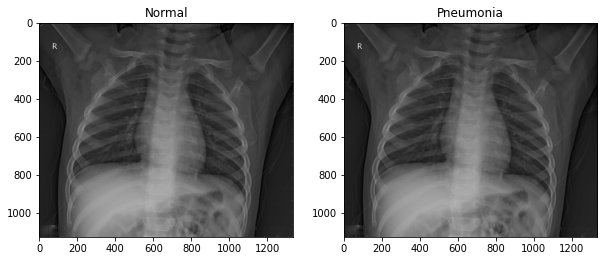

In [7]:
fg = plt.figure(figsize=(10,10))
plot1 = fg.add_subplot(1,2,1)
plot1.set_title('Normal')
plt.imshow(norm_img, cmap = 'gray')

plot2 = fg.add_subplot(1,2,2)
plot2.set_title('Pneumonia')
plt.imshow(norm_img, cmap = 'gray')



In [8]:
IMG_SIZE = (400,400)
#Convert it intoGrayscale
#Convert it into numpy

In [9]:
from PIL import ImageOps

def reshape_img(img):
    return img.resize(IMG_SIZE, Image.LANCZOS)

def convert_to_grayscale(img):
    return ImageOps.grayscale(img)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  after removing the cwd from sys.path.


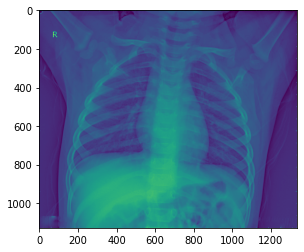

In [10]:
plt.imshow(reshape_img(norm_img))
plt.imshow(convert_to_grayscale(norm_img))

In [11]:
def transform_image(img_path):
   #Load
    img = Image.open(img_path)
   #Resize
    img = reshape_img(img)
    #To grayscale   
    img = convert_to_grayscale(img)
    #to numpy
    return np.array(img)

def load_image_files(img_paths):
    image_array = []
    for img_path in img_paths:
        np_img = transform_image(img_path)
        image_array.append(np_img)
        
    return np.array(image_array)

In [12]:
train_np_n = load_image_files([(train_dir_n + f) for f in os.listdir(train_dir_n)])
train_np_p =  load_image_files([(train_dir_p + f) for f in os.listdir(train_dir_p)])

test_np_n = load_image_files([(test_dir_n + f) for f in os.listdir(test_dir_n)])
test_np_p =  load_image_files([(test_dir_p + f) for f in os.listdir(test_dir_p)])

print("Train normal:", train_np_n.shape)
print("Train pneumonia:", train_np_p.shape)
print("Test normal:", test_np_n.shape)
print("Test pneumonia:", test_np_p.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  after removing the cwd from sys.path.


Train normal: (1341, 400, 400)
Train pneumonia: (3875, 400, 400)
Test normal: (234, 400, 400)
Test pneumonia: (390, 400, 400)


In [13]:
# Target labels
NORM = 0
PNEU = 1

In [14]:
train_np_n_target = np.full((train_np_n.shape[0],1), NORM)
train_np_p_target = np.full((train_np_p.shape[0],1), PNEU)
test_np_n_target = np.full((test_np_n.shape[0],1), NORM)
test_np_p_target = np.full((test_np_p.shape[0],1), PNEU)

In [15]:
#Combine all the training examples into one numpy array
#Combine all the training target labeles into one numpy array
#Combine all the testing examples into one numpy array
#Combine all the testing target labeles into one numpy array

train_np_x = np.concatenate((train_np_n, train_np_p), axis=0)
train_np_y = np.concatenate((train_np_n_target, train_np_p_target), axis=0)
test_np_x = np.concatenate((test_np_n, test_np_p), axis=0)
test_np_y = np.concatenate((test_np_n_target, test_np_p_target), axis=0)

In [16]:
#Optionally
#del train_np_n
#del train_np_p
#del test_np_n
#del tet_np_p

In [17]:
#Flatten out the 2d image data into 1d vector
train_size = train_np_x.shape[0]
test_size = test_np_x.shape[0]
train_np_x = train_np_x.reshape((train_size, -1))
test_np_x = test_np_x.reshape((test_size, -1))
print('Train shape:', train_np_x.shape)
print('Test shape:', test_np_x.shape)

Train shape: (5216, 160000)
Test shape: (624, 160000)


In [18]:
train_np_x.shape

(5216, 160000)

In [19]:
#Train and eval
from sklearn.linear_model import SGDClassifier
classifier_1 = SGDClassifier()
classifier_1.fit(train_np_x, train_np_y.reshape(-1))

SGDClassifier()

In [20]:
#Evaluate
predicted_y = classifier_1.predict(test_np_x)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
actual_y = test_np_y.reshape(-1)
print('Accuracy score:', accuracy_score(actual_y, predicted_y))

Accuracy score: 0.8173076923076923


In [22]:
print('classification report:', classification_report(actual_y, predicted_y))

classification report:               precision    recall  f1-score   support

           0       0.80      0.68      0.74       234
           1       0.82      0.90      0.86       390

    accuracy                           0.82       624
   macro avg       0.81      0.79      0.80       624
weighted avg       0.82      0.82      0.81       624



In [23]:
print('confusion matrix:', confusion_matrix(actual_y, predicted_y))

confusion matrix: [[159  75]
 [ 39 351]]


In [24]:
classifier_2 = SGDClassifier(loss= 'log', max_iter=20, random_state=100)
classifier_2.fit(train_np_x, train_np_y.reshape(-1))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=20, random_state=100)

In [25]:
predicted_y = classifier_2.predict(test_np_x)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
actual_y = test_np_y.reshape(-1)
print('Accuracy score:', accuracy_score(actual_y, predicted_y))

Accuracy score: 0.7067307692307693


In [27]:
print('classification report:', classification_report(actual_y, predicted_y))

classification report:               precision    recall  f1-score   support

           0       0.95      0.23      0.37       234
           1       0.68      0.99      0.81       390

    accuracy                           0.71       624
   macro avg       0.81      0.61      0.59       624
weighted avg       0.78      0.71      0.64       624



In [28]:
print('confusion matrix:', confusion_matrix(actual_y, predicted_y))

confusion matrix: [[ 54 180]
 [  3 387]]


In [32]:
import pickle

model_path = '/kaggle/working/classifier_2.pkl'
with open(model_path, 'wb') as model_file:
 pickle.dump(classifier_2, model_file)
 print('Save the model at', model_path)

Save the model at /kaggle/working/classifier_2.pkl


In [38]:
with open(model_path, 'rb') as model_file:
    loaded_classifier =pickle.load(model_file)
    print('Model loaded from', model_path)

Model loaded from /kaggle/working/classifier_2.pkl


In [56]:
#End to end prediction
sample_iamge_path="/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg"
sample_img_np = load_image_files([sample_iamge_path])
sample_img_np = sample_img_np.reshape((1,-1))
print('Predicted Label:', loaded_classifier.predict(sample_img_np)[0])

Predicted Label: 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  after removing the cwd from sys.path.
